<a href="https://colab.research.google.com/github/jorobledo/curso_aprendizaje_automatico/blob/master/practico/clase_4/Perceptron_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 4: Perceptrón Múltiple

Queremos predecir el precio de casas utilizando un perceptrón simple.

[Imagen de perceptrón múltiple](https://miro.medium.com/max/1138/1*MF1q2Q3fbpYlXX8fZUiwpA.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor


In [ ]:
!wget https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv

--2021-11-19 04:32:53--  https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152963 (149K) [text/plain]
Saving to: ‘SaratogaHouses.csv’

SaratogaHouses.csv  100%[===================>] 149.38K  --.-KB/s    in 0.03s   

2021-11-19 04:32:53 (5.48 MB/s) - ‘SaratogaHouses.csv’ saved [152963/152963]



In [ ]:
url = ("https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
       "Estadistica-machine-learning-python/master/data/SaratogaHouses.csv")
datos = pd.read_csv(url, sep=",")

datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [ ]:
datos

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


## Análisis exploratorio

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

todas las columnas tienen el tipo de dato correcto

In [ ]:
datos.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

No hay valores ausentes en la base de datos

Queremos predecir el precio de las casas. Con lo cual vamos a ver cómo es la distribución de la variable respuesta: 

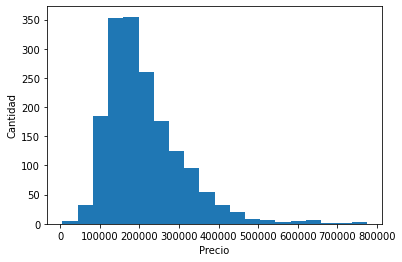

In [ ]:
plt.hist(datos.precio, bins=20)
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.show()

## División del conjunto de datos en entrenamiento y en prueba.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    datos.drop('precio', axis=1),
    datos['precio'],
    train_size = 0.8,
    random_state = 142,
    shuffle = True
)


In [ ]:
X_train.describe()

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.505304,27.247467,34525.434153,1760.500000,55.553546,3.158466,0.601302,1.909551,7.057164
std,0.684362,28.802951,34787.245248,620.660401,10.371085,0.802916,0.558858,0.654563,2.307700
min,0.000000,0.000000,200.000000,672.000000,20.000000,1.000000,0.000000,0.000000,3.000000
25%,0.170000,13.000000,15100.000000,1304.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1626.000000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,0.540000,33.000000,41025.000000,2160.250000,64.000000,4.000000,1.000000,2.500000,8.000000
max,8.970000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [ ]:
X_test.describe()

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.479884,30.586705,34684.017341,1732.910405,55.624277,3.138728,0.604046,1.862717,6.979769
std,0.753866,30.680206,35991.436683,617.433351,10.197066,0.873675,0.545746,0.672932,2.353449
min,0.010000,0.000000,400.000000,616.000000,20.000000,1.000000,0.000000,1.000000,2.000000
25%,0.160000,13.000000,15325.000000,1290.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,0.360000,19.000000,25100.000000,1661.000000,57.000000,3.000000,1.000000,1.500000,7.000000
75%,0.567500,36.000000,37600.000000,2124.750000,64.000000,4.000000,1.000000,2.500000,9.000000
max,12.200000,169.000000,255000.000000,4856.000000,77.000000,7.000000,2.000000,4.000000,12.000000


## Preprocesamiento 
Los modelos de redes neuronales en general necesitan de preprocesamiento. Los dos más comunes son la binarización de las variables categóricas y la estandarización de las variables continuas. 

In [ ]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
numeric_cols

['metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'chimenea',
 'banyos',
 'habitaciones']

In [ ]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols

['calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )


In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
X_train_prep

array([[-0.32933641,  0.13033008, -0.32568068, ...,  0.        ,
         0.        ,  1.        ],
       [-0.50474557, -0.39063841, -0.54135499, ...,  0.        ,
         1.        ,  0.        ],
       [-0.27086669, -0.94633814,  0.55714614, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.16854468,  0.37344871, -0.14163861, ...,  0.        ,
         1.        ,  0.        ],
       [-0.49012814,  0.40817995,  0.61178363, ...,  0.        ,
         1.        ,  0.        ],
       [-0.06622267,  0.30398625, -0.20490307, ...,  0.        ,
         1.        ,  0.        ]])

transformamos la salida en dataframe y añadimos el nombre de las columnas

In [ ]:
encoded_cat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = pd.DataFrame(X_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   chimenea                     1382 non-null   float64
 7   banyos                       1382 non-null   float64
 8   habitaciones                 1382 non-null   float64
 9   calefaccion_electric         1382 non-null   float64
 10  calefaccion_hot air          1382 non-null   float64
 11  calefaccion_hot water/steam  1382 non-null   float64
 12  consumo_calefacion_electric  1382 non-null   float64
 13  consumo_calefacion

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
datos_train_prep

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion_electric,calefaccion_hot air,calefaccion_hot water/steam,consumo_calefacion_electric,consumo_calefacion_gas,consumo_calefacion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
0,-0.329336,0.130330,-0.325681,0.240960,0.814718,-0.197434,0.713672,-0.625913,-0.024780,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.504746,-0.390638,-0.541355,-1.367587,-0.342764,-1.443345,0.713672,-0.625913,-0.024780,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.270867,-0.946338,0.557146,0.593937,0.814718,1.048476,0.713672,0.902376,0.842198,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.664649,0.616567,-0.742651,-0.593937,0.621805,-0.197434,-1.076337,-1.390057,-0.891757,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.036988,-0.008595,-0.081250,0.179712,-0.342764,1.048476,0.713672,0.902376,0.408709,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,0.606179,-0.564295,-0.918066,-0.274807,-1.886073,-1.443345,0.713672,0.138232,-0.458269,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1378,-0.270867,-0.599026,-0.685138,-0.455325,-0.149850,-0.197434,0.713672,0.902376,-0.891757,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1379,-0.168545,0.373449,-0.141639,0.053994,0.814718,1.048476,0.713672,-0.625913,1.275687,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1380,-0.490128,0.408180,0.611784,-1.161280,0.621805,2.294386,-1.076337,-0.625913,-0.458269,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
modelo = MLPRegressor(activation='relu')

In [ ]:
param_distributions = {
    'hidden_layer_sizes': [(10), (20), (10, 10)],
    'alpha': np.logspace(-3, 3, 10),
    'learning_rate_init': [0.001, 0.01],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing

grid = RandomizedSearchCV(
        estimator  = modelo,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 2, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

In [ ]:
grid.fit(X = datos_train_prep, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

RandomizedSearchCV(cv=2, estimator=MLPRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'hidden_layer_sizes': [10, 20,
                                                               (10, 10)],
                                        'learning_rate_init': [0.001, 0.01]},
                   random_state=123, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)

In [ ]:
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.308978,0.002890,0.003261,1.645088e-05,0.001,10,0.464159,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-5.810051e+10,-5.128868e+10,-5.469459e+10,3.405912e+09,45,-5.129057e+10,-5.809678e+10,-5.469368e+10,3.403106e+09
1,0.357412,0.023112,0.003653,8.201599e-05,0.01,20,10,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.159979e+10,-4.416062e+10,-4.788021e+10,3.719584e+09,14,-4.563597e+10,-4.980876e+10,-4.772236e+10,2.086394e+09
2,0.363724,0.002765,0.003673,1.041889e-04,0.01,20,0.0215443,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.164326e+10,-4.319267e+10,-4.741796e+10,4.225298e+09,12,-4.564671e+10,-4.870044e+10,-4.717357e+10,1.526866e+09
3,0.321244,0.026071,0.003306,4.959106e-05,0.01,10,2.15443,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.331056e+10,-4.864937e+10,-5.097997e+10,2.330597e+09,21,-4.711922e+10,-5.502349e+10,-5.107136e+10,3.952134e+09
4,0.299291,0.008136,0.003303,9.346008e-05,0.01,10,46.4159,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.508066e+10,-4.761168e+10,-5.134617e+10,3.734493e+09,24,-4.866706e+10,-5.381973e+10,-5.124340e+10,2.576335e+09
5,0.404061,0.001468,0.003615,5.471706e-05,0.001,"(10, 10)",215.443,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-5.739659e+10,-5.044978e+10,-5.392319e+10,3.473405e+09,29,-5.067614e+10,-5.712355e+10,-5.389984e+10,3.223705e+09
6,0.321725,0.008375,0.002990,5.508661e-04,0.001,10,0.1,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-5.808456e+10,-5.130605e+10,-5.469530e+10,3.389256e+09,46,-5.127660e+10,-5.811687e+10,-5.469674e+10,3.420133e+09
7,0.406738,0.009143,0.002532,1.151562e-04,0.001,"(10, 10)",10,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-5.767025e+10,-5.047985e+10,-5.407505e+10,3.595199e+09,32,-5.090944e+10,-5.716589e+10,-5.403767e+10,3.128223e+09
8,0.313632,0.001256,0.002434,4.613400e-05,0.01,10,1000,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.273061e+10,-4.811839e+10,-5.042450e+10,2.306111e+09,18,-4.661883e+10,-5.441181e+10,-5.051532e+10,3.896494e+09
9,0.296316,0.001574,0.002376,7.152557e-07,0.01,10,0.0215443,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.634130e+10,-4.968567e+10,-5.301348e+10,3.327818e+09,26,-4.974653e+10,-5.623876e+10,-5.299264e+10,3.246112e+09


In [ ]:
modelo_final = grid.best_estimator_

In [ ]:
modelo_final

MLPRegressor(alpha=2.154434690031882, hidden_layer_sizes=(10, 10),
             learning_rate_init=0.01)

In [ ]:
datos_test_prep = pd.DataFrame(X_test_prep, columns=labels)
predicciones = modelo_final.predict(X = datos_test_prep)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

57978.088331181905

In [ ]:
predicciones[0]

176384.30002953552

In [ ]:
y_test.iloc[1]

117900

In [ ]:
y_test.shape

(346,)

In [ ]:
i=20
y_test.iloc[i]-predicciones[i]

15387.809964740853

In [ ]:
modelo_final.get_params()

{'activation': 'relu',
 'alpha': 2.154434690031882,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}